In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/AI/Dataset.zip','r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/AI/')

## 引入库

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from mpl_toolkits import mplot3d
##导入PCA库
##导入LDA库
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
from sklearn.neighbors import KNeighborsClassifier as kNN
##导入PCA库
from sklearn.decomposition import PCA
##导入LDA库
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
## 搭建CNN所需要的库
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from datetime import datetime
import time

In [ ]:
path="/content/drive/MyDrive/AI/"
answer="哈尔滨工业大学的校训是规格严功夫到家"
lens=20

## 预处理数据

In [ ]:
def get_train_large(num,inter): #原始400个特征
  train_large_path = path+"Dataset/train_large/L_"+str(num+1)+".bmp"
  img = cv2.imread(train_large_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (lens, lens),interpolation=inter)

  thresh, new_img = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)
  seq = []
  for i in range(lens):
      for j in range(lens):
          if new_img[i][j] > 0:
              seq.append(1)
          else:
              seq.append(0)
  return seq

def get_train_samll(num,inter): #原始400个特征
  train_large_path = path+"Dataset/train_small/S_"+str(num+1)+".bmp"
  img = cv2.imread(train_large_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (lens, lens),interpolation=inter)
  thresh, new_img = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)
  seq = []
  for i in range(lens):
      for j in range(lens):
          if new_img[i][j] > 0:
              seq.append(1)
          else:
              seq.append(0)
  return seq

def get_test(num,inter): #原始400个特征
  train_large_path = path+"Dataset/test_all/T_"+str(num+1)+".bmp"
  img = cv2.imread(train_large_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (lens, lens),interpolation=inter)
  thresh, new_img = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)
  seq = []
  for i in range(lens):
      for j in range(lens):
          if new_img[i][j] > 0:
              seq.append(1)
          else:
              seq.append(0)
  return seq

In [ ]:
def getdataset(interpolation):
  train_set=[]
  train_labels=[]
  test_set=[]
  test_labels=[]
  for i in range(152):
      num=i%19
      if (num<14):
          seq1=get_train_large(i,interpolation)
          train_set.append(seq1)
          train_labels.append(num)
          seq2=get_train_samll(i,interpolation)
          train_set.append(seq2)
          train_labels.append(num)
          seq3 = get_test(i,interpolation)
          test_set.append(seq3)
          test_labels.append(num)
      elif(num>14):
          seq1=get_train_large(i,interpolation)
          train_set.append(seq1)
          train_labels.append(num-1)
          seq2=get_train_samll(i,interpolation)
          train_set.append(seq2)
          train_labels.append(num-1)
          seq3 = get_test(i,interpolation)
          test_set.append(seq3)
          test_labels.append(num-1)
  train_set=np.array(train_set)
  test_set=np.array(test_set)

  train_set = tf.cast(train_set,dtype=tf.float64)
  test_set = tf.cast(test_set,dtype=tf.float64)
  train_labels = tf.cast(train_labels,dtype=tf.float64)
  test_labels = tf.cast(test_labels,dtype=tf.float64)

  return train_set,train_labels,test_set,test_labels

In [ ]:
getdataset(cv2.INTER_AREA)

(<tf.Tensor: shape=(288, 400), dtype=float64, numpy=
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]])>,
 <tf.Tensor: shape=(288,), dtype=float64, numpy=
 array([ 0.,  0.,  1.,  1.,  2.,  2.,  3.,  3.,  4.,  4.,  5.,  5.,  6.,
         6.,  7.,  7.,  8.,  8.,  9.,  9., 10., 10., 11., 11., 12., 12.,
        13., 13., 14., 14., 15., 15., 16., 16., 17., 17.,  0.,  0.,  1.,
         1.,  2.,  2.,  3.,  3.,  4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.,
         8.,  8.,  9.,  9., 10., 10., 11., 11., 12., 12., 13., 13., 14.,
        14., 15., 15., 16., 16., 17., 17.,  0.,  0.,  1.,  1.,  2.,  2.,
         3.,  3.,  4.,  4.,  5.,  5.,  6.,  6.,  7.,  7.,  8.,  8.,  9.,
         9., 10., 10., 11., 11., 12., 12., 13., 13., 14., 14., 15., 15.,
        16., 16., 17., 17.,  0.,  0.,  1.,  1.,  2.,  2.,  3.,  

In [ ]:
def get_train_large1(num,inter): #原始400个特征
  train_large_path = path+"Dataset/train_large/L_"+str(num+1)+".bmp"
  img = cv2.imread(train_large_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (lens, lens),interpolation=inter)
  thresh, new_img = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)

  return new_img

def get_train_samll1(num,inter): #原始400个特征
  train_large_path = path+"Dataset/train_small/S_"+str(num+1)+".bmp"
  img = cv2.imread(train_large_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (lens, lens),interpolation=inter)
  thresh, new_img = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)

  return new_img

def get_test1(num,inter): #原始400个特征
  train_large_path = path+"Dataset/test_all/T_"+str(num+1)+".bmp"
  img = cv2.imread(train_large_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (lens, lens),interpolation=inter)
  thresh, new_img = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)
  return new_img

def getdataset1(interpolation):
  train_set = []
  train_labels = []
  test_set = []
  test_labels = []
  for i in range(152):
      num = i % 19
      if (num<14):
          seq1 = get_train_large1(i, interpolation)
          train_set.append(seq1)
          train_labels.append(num)
          seq2 = get_train_samll1(i, interpolation)
          train_set.append(seq2)
          train_labels.append(num)
          seq3 = get_test1(i, interpolation)
          test_set.append(seq3)
          test_labels.append(num)
      elif (num>14):
          seq1 = get_train_large1(i, interpolation)
          train_set.append(seq1)
          train_labels.append(num-1)
          seq2 = get_train_samll1(i, interpolation)
          train_set.append(seq2)
          train_labels.append(num-1)
          seq3 = get_test1(i, interpolation)
          test_set.append(seq3)
          test_labels.append(num-1)
  train_set = np.array(train_set)
  test_set = np.array(test_set)
  train_labels = np.array(train_labels)
  test_labels = np.array(test_labels)

  # print(train_set.shape)
  # print(train_labels.shape)

  return train_set,train_labels,test_set,test_labels

In [ ]:
class DataLoader(object):
    def __init__(self, inter):
        self.train_data, self.train_label, self.test_data, self.test_label = getdataset1(inter)
        self.train_data = self.train_data.reshape(288, 400)  # 训练数据288个，400个像素点
        self.test_data= self.test_data.reshape(144, 400)
        self.train_data = np.expand_dims(self.train_data.astype(np.float32) / 255.0, axis=-1)
        self.test_data = np.expand_dims(self.test_data.astype(np.float32) / 255.0, axis=-1)
        self.train_label = self.train_label.astype(np.int32)  # [60000]
        self.test_label = self.test_label.astype(np.int32)  # [10000]
        self.train_label = keras.utils.to_categorical(self.train_label)
        self.test_label= keras.utils.to_categorical(self.test_label)  #将数字图片表示的标签转化为one-hot代码

    def get_data(self):
        return self.train_data,self.train_label,self.test_data,self.test_label

## 【LDA+KNN】LDA+KNN主题代码

In [ ]:
def ldaknn(interpolation, components, neighbors):
  train_set=[]
  train_labels=[]
  test_set=[]
  test_labels=[]
  train_set,train_labels,test_set,test_labels = getdataset(interpolation)

  start_time = time.time()
  # 载入LDA模型，设置压缩后的维度
  lda = LDA(n_components=components)
  lda.fit(train_set, train_labels)
  train_lda_set = np.real(lda.transform(train_set))
  test_lda_set = np.real(lda.transform(test_set))
  # 载入KNN分类器，并设置邻居值
  knn = KNN(n_neighbors=neighbors, algorithm='auto')
  knn.fit(train_lda_set, train_labels)
  end_time = time.time()
  # 训练时间
  train_time = end_time - start_time

  # 训练集准确率测试
  error_count = 0
  for i in range(288):
      class_number = int(train_labels[i])
      classifier_result = knn.predict(train_lda_set[i].reshape(1, -1))

      if classifier_result != class_number:
          error_count += 1.0
  train_accuracy = (288 - error_count) / 288

  # 测试集准确率测试
  start_time = time.time()
  error_count = 0
  for i in range(144):
      class_number = int(test_labels[i])
      classifier_result = knn.predict(test_lda_set[i].reshape(1, -1))

      if classifier_result != class_number:
          error_count += 1.0
  test_accuracy = (144 - error_count) / 144
  end_time = time.time()
  # 测试时间
  test_time = end_time - start_time
  print("interpolation={} components={} neighbors={} 时，\ntrain_accuracy={} train_time={} test_accuracy={} test_time={}".format(interpolation, components, neighbors,train_accuracy, train_time, test_accuracy, test_time))
  return train_accuracy, train_time, test_accuracy, test_time

In [ ]:
ldaknn(cv2.INTER_AREA,17,3)

interpolation=3 components=17 neighbors=3 时，
train_accuracy=1.0 train_time=0.05707502365112305 test_accuracy=0.8333333333333334 test_time=0.13691401481628418


(1.0, 0.05707502365112305, 0.8333333333333334, 0.13691401481628418)

####【LDA+KNN】对于不同的KNN参数k和LDA降维不同，带来的不同影响

1
interpolation=0 components=17 neighbors=1 时，
train_accuracy=1.0 train_time=0.06043505668640137 test_accuracy=0.7083333333333334 test_time=0.1397082805633545
2
interpolation=0 components=17 neighbors=2 时，
train_accuracy=1.0 train_time=0.05392932891845703 test_accuracy=0.7222222222222222 test_time=0.13861703872680664
3
interpolation=0 components=17 neighbors=3 时，
train_accuracy=1.0 train_time=0.06655716896057129 test_accuracy=0.6875 test_time=0.14747858047485352
4
interpolation=0 components=17 neighbors=4 时，
train_accuracy=1.0 train_time=0.05434584617614746 test_accuracy=0.7291666666666666 test_time=0.13448762893676758
5
interpolation=0 components=17 neighbors=5 时，
train_accuracy=1.0 train_time=0.055843353271484375 test_accuracy=0.6944444444444444 test_time=0.1365804672241211
6
interpolation=0 components=17 neighbors=6 时，
train_accuracy=1.0 train_time=0.11941218376159668 test_accuracy=0.7152777777777778 test_time=0.13443827629089355
7
interpolation=0 components=17 neighbors=7 时，
train_

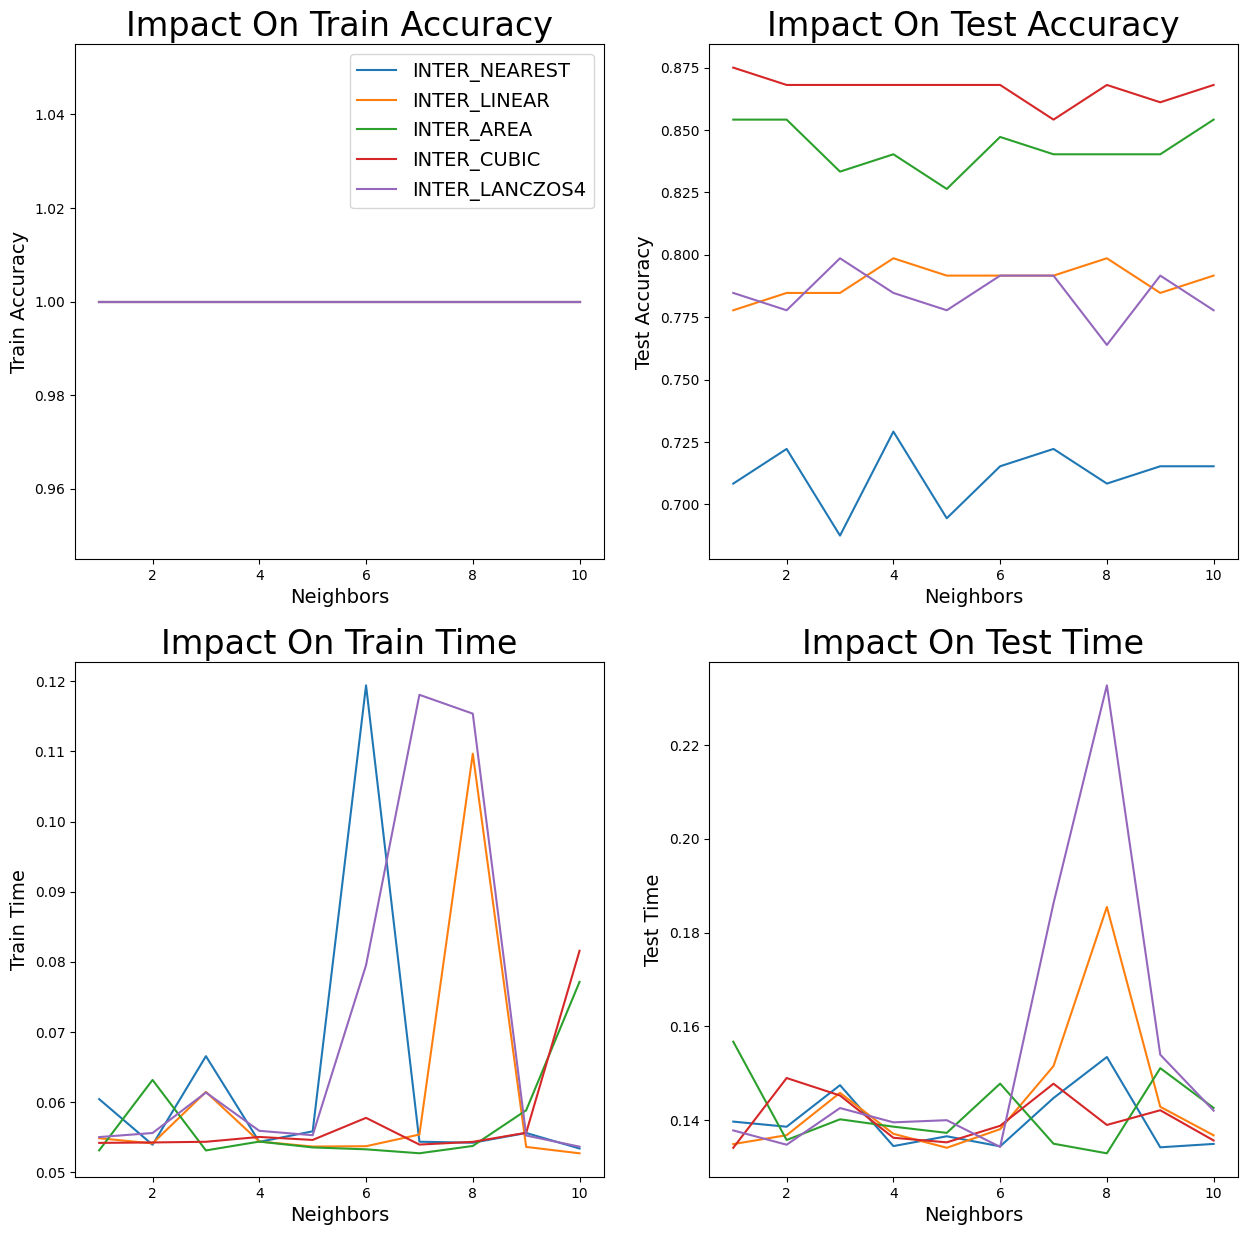

In [ ]:
interpolations=[cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
lables=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
figure = plt.figure(figsize=(15, 15), dpi=100)
ax = figure.add_subplot(221)
bx = figure.add_subplot(222)
cx = figure.add_subplot(223)
dx = figure.add_subplot(224)

for i in range(5):
  train_accuracies=[]
  test_accuracies=[]
  train_times=[]
  test_times=[]
  for j in range(1,11):
    print(j)
    train_accuracy, train_time, test_accuracy, test_time=ldaknn(interpolations[i],17,j)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_times.append(train_time)
    test_times.append(test_time)

  ax.plot(np.arange(1, 11),train_accuracies, label=lables[i])
  bx.plot(np.arange(1, 11),test_accuracies, label=lables[i])
  cx.plot(np.arange(1, 11),train_times, label=lables[i])
  dx.plot(np.arange(1, 11),test_times, label=lables[i])

ax.set_title("Impact On Train Accuracy", fontsize=24)
ax.set_xlabel('Neighbors', fontsize=14)
ax.set_ylabel('Train Accuracy', fontsize=14)

bx.set_title("Impact On Test Accuracy", fontsize=24)
bx.set_xlabel('Neighbors', fontsize=14)
bx.set_ylabel('Test Accuracy', fontsize=14)

cx.set_title("Impact On Train Time", fontsize=24)
cx.set_xlabel('Neighbors', fontsize=14)
cx.set_ylabel('Train Time', fontsize=14)

dx.set_title("Impact On Test Time", fontsize=24)
dx.set_xlabel('Neighbors', fontsize=14)
dx.set_ylabel('Test Time', fontsize=14)

ax.legend(loc="best", fontsize=14)
plt.show()

####【LDA+KNN】对于不同的resize算法和components不同，带来的不同影响

1
interpolation=0 components=1 neighbors=3 时，
train_accuracy=0.5868055555555556 train_time=0.05507326126098633 test_accuracy=0.10416666666666667 test_time=0.1485600471496582
2
interpolation=0 components=2 neighbors=3 时，
train_accuracy=0.8020833333333334 train_time=0.12215995788574219 test_accuracy=0.2569444444444444 test_time=0.20615649223327637
3
interpolation=0 components=3 neighbors=3 时，
train_accuracy=0.9201388888888888 train_time=0.11217951774597168 test_accuracy=0.3541666666666667 test_time=0.19541454315185547
4
interpolation=0 components=4 neighbors=3 时，
train_accuracy=0.9618055555555556 train_time=0.05599355697631836 test_accuracy=0.4027777777777778 test_time=0.1403048038482666
5
interpolation=0 components=5 neighbors=3 时，
train_accuracy=0.9722222222222222 train_time=0.05531930923461914 test_accuracy=0.4652777777777778 test_time=0.14611124992370605
6
interpolation=0 components=6 neighbors=3 时，
train_accuracy=0.9930555555555556 train_time=0.0564882755279541 test_accuracy=0.52083

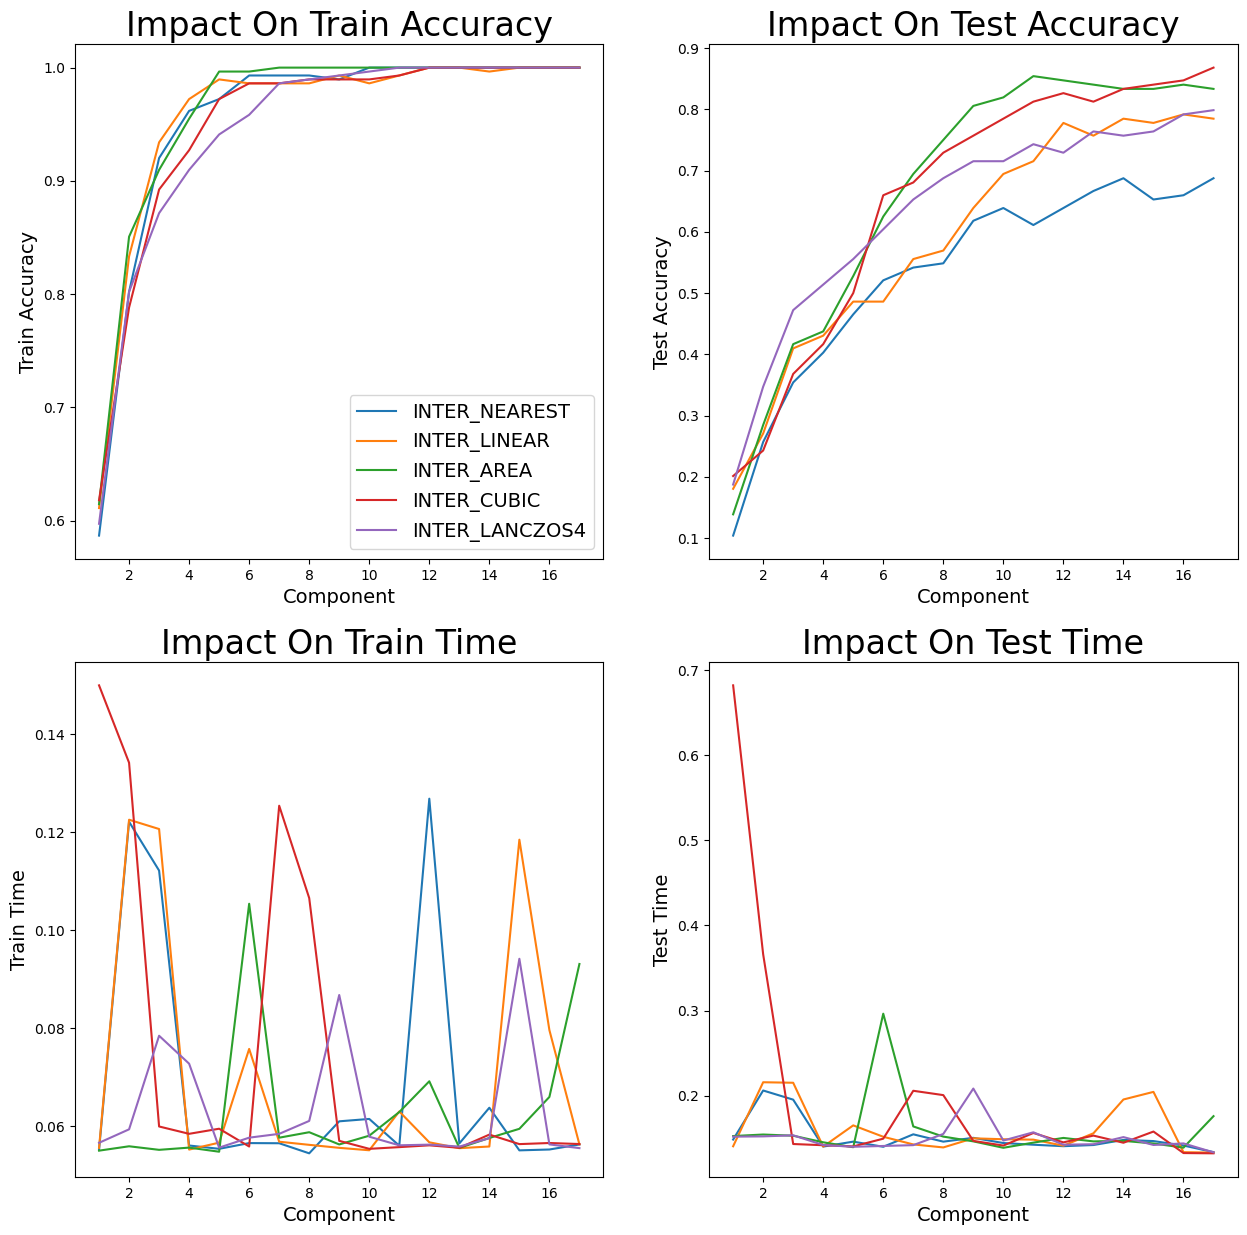

In [ ]:
interpolations=[cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
lables=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
figure = plt.figure(figsize=(15, 15), dpi=100)
ax = figure.add_subplot(221)
bx = figure.add_subplot(222)
cx = figure.add_subplot(223)
dx = figure.add_subplot(224)

for i in range(5):
  train_accuracies=[]
  test_accuracies=[]
  train_times=[]
  test_times=[]
  for j in range(1,18):
    print(j)
    train_accuracy, train_time, test_accuracy, test_time=ldaknn(interpolations[i],j,3)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_times.append(train_time)
    test_times.append(test_time)

  ax.plot(np.arange(1, 18),train_accuracies, label=lables[i])
  bx.plot(np.arange(1, 18),test_accuracies, label=lables[i])
  cx.plot(np.arange(1, 18),train_times, label=lables[i])
  dx.plot(np.arange(1, 18),test_times, label=lables[i])

ax.set_title("Impact On Train Accuracy", fontsize=24)
ax.set_xlabel('Component', fontsize=14)
ax.set_ylabel('Train Accuracy', fontsize=14)

bx.set_title("Impact On Test Accuracy", fontsize=24)
bx.set_xlabel('Component', fontsize=14)
bx.set_ylabel('Test Accuracy', fontsize=14)

cx.set_title("Impact On Train Time", fontsize=24)
cx.set_xlabel('Component', fontsize=14)
cx.set_ylabel('Train Time', fontsize=14)

dx.set_title("Impact On Test Time", fontsize=24)
dx.set_xlabel('Component', fontsize=14)
dx.set_ylabel('Test Time', fontsize=14)

ax.legend(loc="best", fontsize=14)
plt.show()

## 【PCA+KNN】PCA+KNN主题代码

In [ ]:
def pcaknn(interpolation, components, neighbors):
  train_set=[]
  train_labels=[]
  test_set=[]
  test_labels=[]
  train_set,train_labels,test_set,test_labels = getdataset(interpolation)

  start_time = time.time()
  # 载入PCA模型，设置压缩后的维度
  pca = PCA(n_components=components)
  pca.fit(train_set, train_labels)
  train_pca_set = np.real(pca.transform(train_set))
  test_pca_set = np.real(pca.transform(test_set))
  # 载入KNN分类器，并设置邻居值
  knn = KNN(n_neighbors=neighbors, algorithm='auto')
  knn.fit(train_pca_set, train_labels)
  end_time = time.time()
  # 训练时间
  train_time = end_time - start_time

  # 训练集准确率测试
  error_count = 0
  for i in range(288):
      class_number = int(train_labels[i])
      classifier_result = knn.predict(train_pca_set[i].reshape(1, -1))

      if classifier_result != class_number:
          error_count += 1.0
  train_accuracy = (288 - error_count) / 288

  # 测试集准确率测试
  start_time = time.time()
  error_count = 0
  for i in range(144):
      class_number = int(test_labels[i])
      classifier_result = knn.predict(test_pca_set[i].reshape(1, -1))

      if classifier_result != class_number:
          error_count += 1.0
  test_accuracy = (144 - error_count) / 144
  end_time = time.time()
  # 测试时间
  test_time = end_time - start_time
  print("interpolation={} components={} neighbors={} 时，\ntrain_accuracy={} train_time={} test_accuracy={} test_time={}".format(interpolation, components, neighbors,train_accuracy, train_time, test_accuracy, test_time))
  return train_accuracy, train_time, test_accuracy, test_time

####【PCA+KNN】效果最好的PCA+KNN方案

In [ ]:
pcaknn(cv2.INTER_AREA,20,3)

interpolation=3 components=20 neighbors=3 时，
train_accuracy=1.0 train_time=0.04619932174682617 test_accuracy=0.9236111111111112 test_time=0.13513541221618652


(1.0, 0.04619932174682617, 0.9236111111111112, 0.13513541221618652)

####【PCA+KNN】对于不同的KNN参数Neighbors，带来的不同影响

1
interpolation=0 components=17 neighbors=1 时，
train_accuracy=1.0 train_time=0.07789111137390137 test_accuracy=0.7083333333333334 test_time=0.14374351501464844
2
interpolation=0 components=17 neighbors=2 时，
train_accuracy=0.9826388888888888 train_time=0.056632280349731445 test_accuracy=0.7152777777777778 test_time=0.13369369506835938
3
interpolation=0 components=17 neighbors=3 时，
train_accuracy=0.9826388888888888 train_time=0.0951688289642334 test_accuracy=0.7152777777777778 test_time=0.18339276313781738
4
interpolation=0 components=17 neighbors=4 时，
train_accuracy=0.9513888888888888 train_time=0.10959124565124512 test_accuracy=0.7222222222222222 test_time=0.14022231101989746
5
interpolation=0 components=17 neighbors=5 时，
train_accuracy=0.9201388888888888 train_time=0.043491363525390625 test_accuracy=0.7013888888888888 test_time=0.13527750968933105
6
interpolation=0 components=17 neighbors=6 时，
train_accuracy=0.9097222222222222 train_time=0.04551267623901367 test_accuracy=0.72916666666

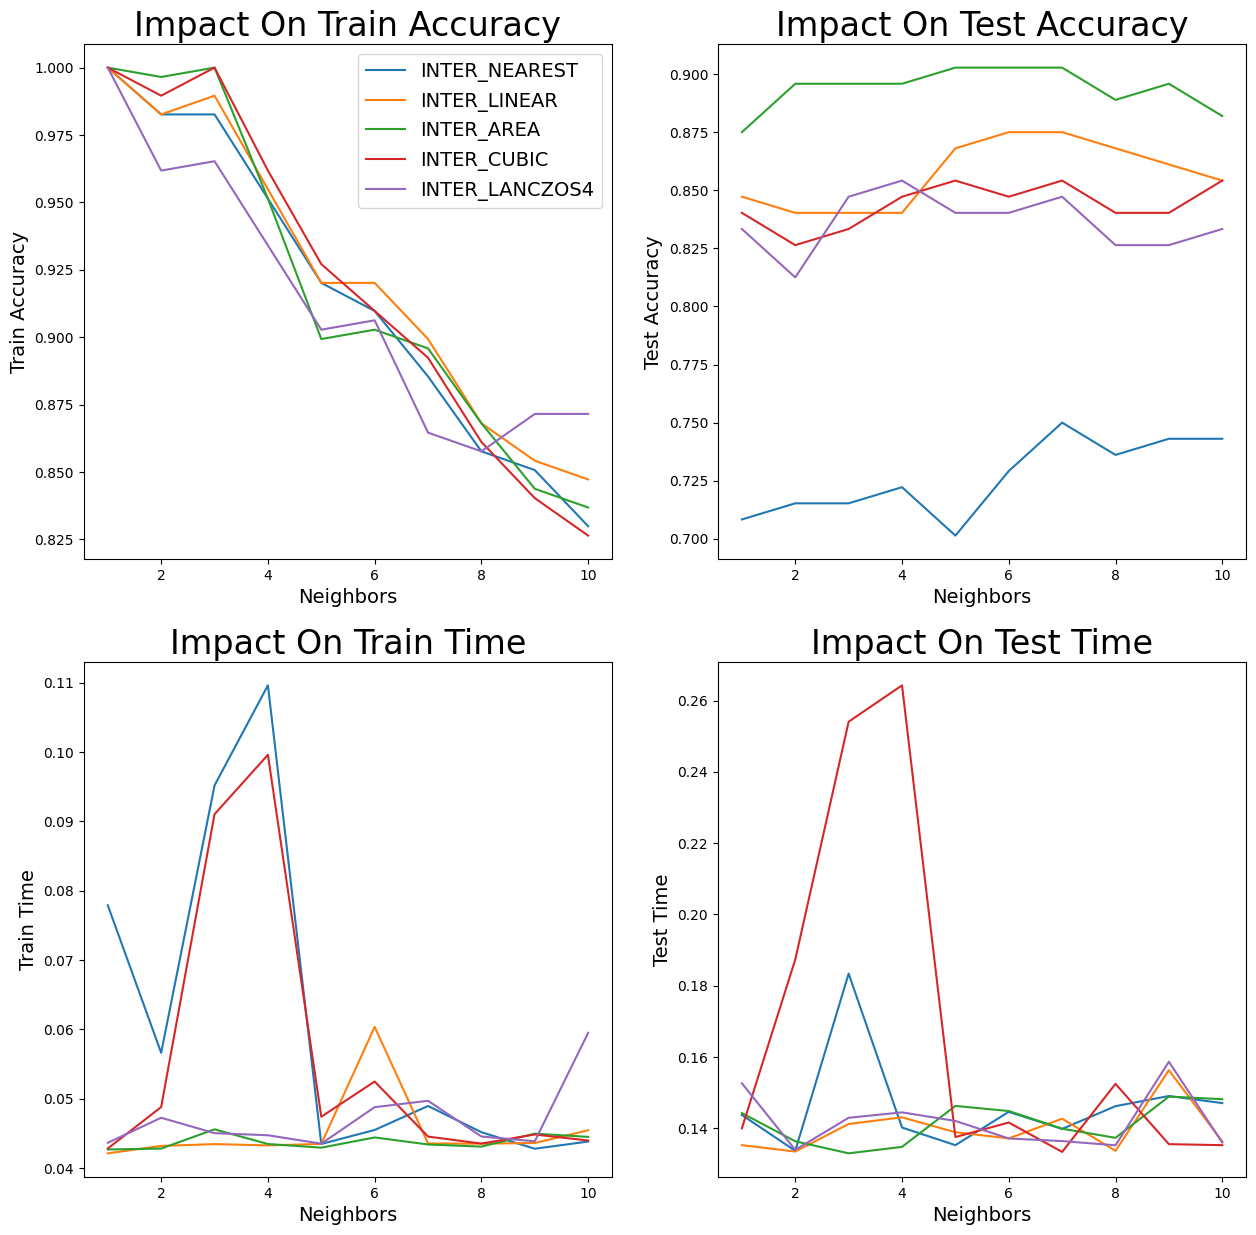

In [ ]:
interpolations=[cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
lables=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
figure = plt.figure(figsize=(15, 15), dpi=100)
ax = figure.add_subplot(221)
bx = figure.add_subplot(222)
cx = figure.add_subplot(223)
dx = figure.add_subplot(224)

for i in range(5):
  train_accuracies=[]
  test_accuracies=[]
  train_times=[]
  test_times=[]
  for j in range(1,11):
    print(j)
    train_accuracy, train_time, test_accuracy, test_time=pcaknn(interpolations[i],17,j)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_times.append(train_time)
    test_times.append(test_time)

  ax.plot(np.arange(1, 11),train_accuracies, label=lables[i])
  bx.plot(np.arange(1, 11),test_accuracies, label=lables[i])
  cx.plot(np.arange(1, 11),train_times, label=lables[i])
  dx.plot(np.arange(1, 11),test_times, label=lables[i])

ax.set_title("Impact On Train Accuracy", fontsize=24)
ax.set_xlabel('Neighbors', fontsize=14)
ax.set_ylabel('Train Accuracy', fontsize=14)

bx.set_title("Impact On Test Accuracy", fontsize=24)
bx.set_xlabel('Neighbors', fontsize=14)
bx.set_ylabel('Test Accuracy', fontsize=14)

cx.set_title("Impact On Train Time", fontsize=24)
cx.set_xlabel('Neighbors', fontsize=14)
cx.set_ylabel('Train Time', fontsize=14)

dx.set_title("Impact On Test Time", fontsize=24)
dx.set_xlabel('Neighbors', fontsize=14)
dx.set_ylabel('Test Time', fontsize=14)

ax.legend(loc="best", fontsize=14)
plt.show()

####【PCA+KNN】对于不同的resize算法和PCA参数Component不同，带来的不同影响

1
interpolation=0 components=1 neighbors=3 时，
train_accuracy=0.3888888888888889 train_time=0.04506707191467285 test_accuracy=0.08333333333333333 test_time=0.14124083518981934
2
interpolation=0 components=2 neighbors=3 时，
train_accuracy=0.4791666666666667 train_time=0.044203758239746094 test_accuracy=0.14583333333333334 test_time=0.14412379264831543
3
interpolation=0 components=3 neighbors=3 时，
train_accuracy=0.6319444444444444 train_time=0.0438685417175293 test_accuracy=0.3472222222222222 test_time=0.19121313095092773
4
interpolation=0 components=4 neighbors=3 时，
train_accuracy=0.7326388888888888 train_time=0.09464144706726074 test_accuracy=0.4375 test_time=0.1986539363861084
5
interpolation=0 components=5 neighbors=3 时，
train_accuracy=0.8055555555555556 train_time=0.04427647590637207 test_accuracy=0.5555555555555556 test_time=0.16843938827514648
6
interpolation=0 components=6 neighbors=3 时，
train_accuracy=0.8611111111111112 train_time=0.0429229736328125 test_accuracy=0.583333333333333

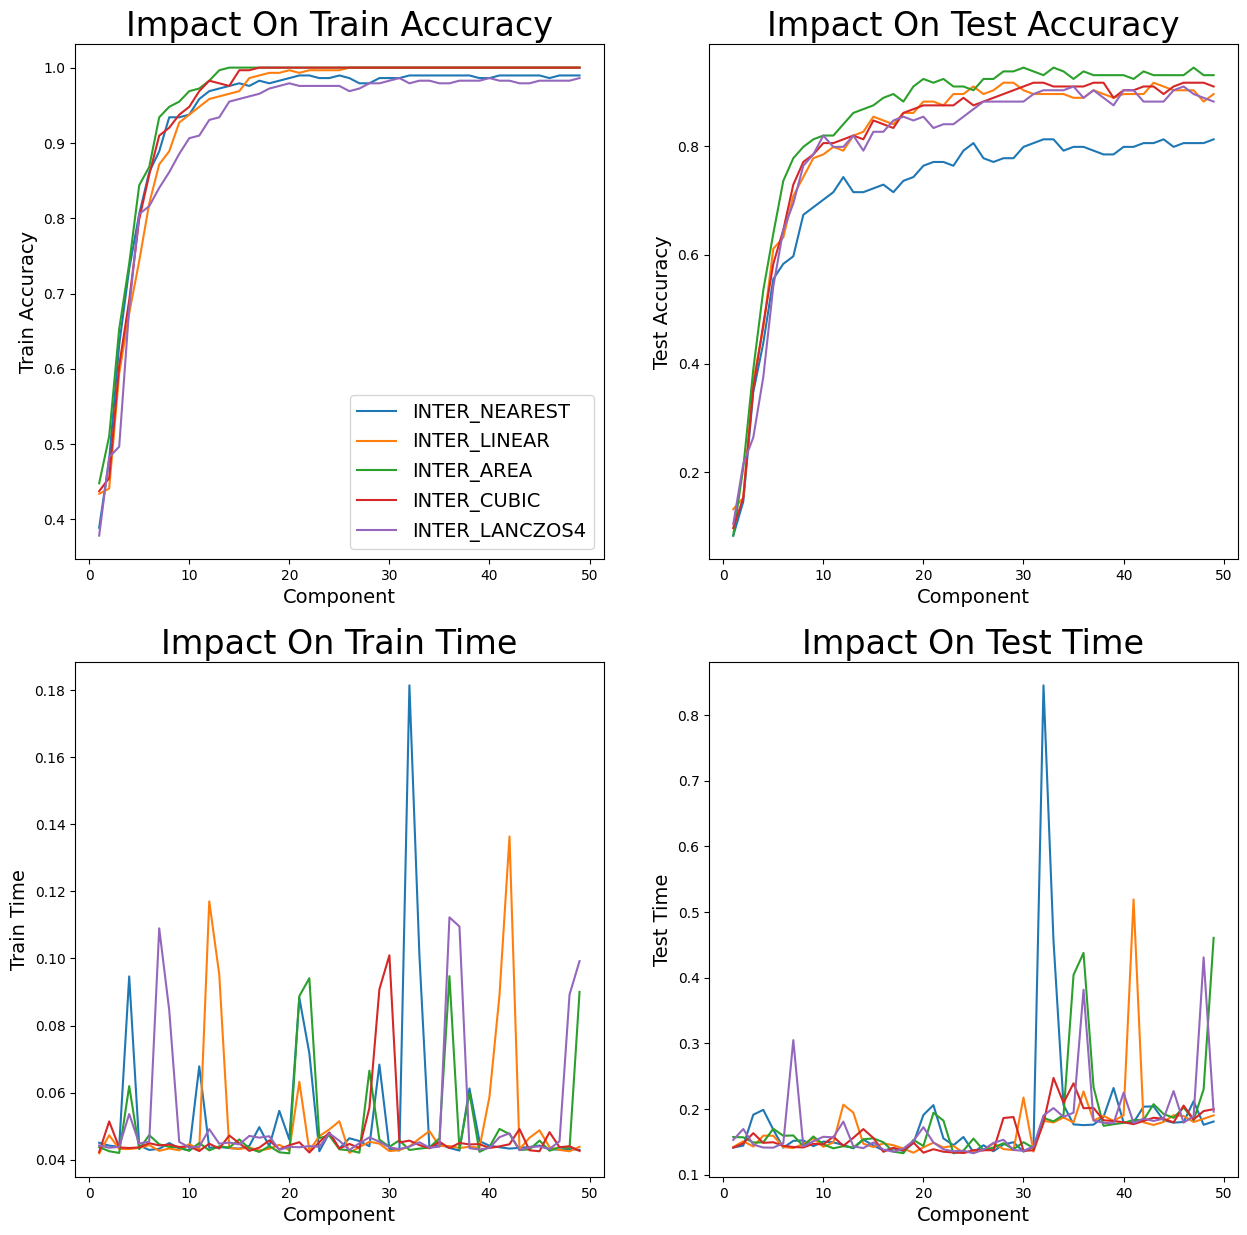

In [ ]:
interpolations=[cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
lables=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
figure = plt.figure(figsize=(15, 15), dpi=100)
ax = figure.add_subplot(221)
bx = figure.add_subplot(222)
cx = figure.add_subplot(223)
dx = figure.add_subplot(224)

for i in range(5):
  train_accuracies=[]
  test_accuracies=[]
  train_times=[]
  test_times=[]
  for j in range(1,50):
    print(j)
    train_accuracy, train_time, test_accuracy, test_time=pcaknn(interpolations[i],j,3)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_times.append(train_time)
    test_times.append(test_time)

  ax.plot(np.arange(1, 50),train_accuracies, label=lables[i])
  bx.plot(np.arange(1, 50),test_accuracies, label=lables[i])
  cx.plot(np.arange(1, 50),train_times, label=lables[i])
  dx.plot(np.arange(1, 50),test_times, label=lables[i])

ax.set_title("Impact On Train Accuracy", fontsize=24)
ax.set_xlabel('Component', fontsize=14)
ax.set_ylabel('Train Accuracy', fontsize=14)

bx.set_title("Impact On Test Accuracy", fontsize=24)
bx.set_xlabel('Component', fontsize=14)
bx.set_ylabel('Test Accuracy', fontsize=14)

cx.set_title("Impact On Train Time", fontsize=24)
cx.set_xlabel('Component', fontsize=14)
cx.set_ylabel('Train Time', fontsize=14)

dx.set_title("Impact On Test Time", fontsize=24)
dx.set_xlabel('Component', fontsize=14)
dx.set_ylabel('Test Time', fontsize=14)

ax.legend(loc="best", fontsize=14)
plt.show()

## 【MLP】多层感知机

####六步法构建模型

加载数据

In [ ]:
dl = DataLoader(cv2.INTER_AREA)
train_data,train_label,test_data,test_label=dl.get_data()

参数

In [ ]:
batch_size = 32   #一般是2的n次方
epochs = 20   #迭代次数
num_classes =18

创建模型

In [ ]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(400,)))   #全连接层，激活函数，输入400个向量
model.add(Dropout(0.2))                                      #防止过拟合
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))           #最后一层全连接，18分类，18个神经元，'softmax'为激活函数，专门针对多分类
model.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 256)               102656    
                                                                 
 dropout_76 (Dropout)        (None, 256)               0         
                                                                 
 dense_153 (Dense)           (None, 128)               32896     
                                                                 
 dropout_77 (Dropout)        (None, 128)               0         
                                                                 
 dense_154 (Dense)           (None, 18)                2322      
                                                                 
Total params: 137,874
Trainable params: 137,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 打印训练时间
# 回调——————打印总训练时间（从最初到当前epoch所花费的时间）
class timecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.times = []
        self.epochs = []
        # use this value as reference to calculate cummulative time taken
        self.timetaken = tf.timestamp()
    def on_epoch_end(self,epoch,logs = {}):
        t=tf.timestamp() - self.timetaken
        time=t.numpy()
        self.times.append(time)
        print(' - cost time: ',time)
        self.epochs.append(epoch+1)
    def on_train_end(self,logs = {}):
          fig = plt.figure()
          ax = fig.add_axes([0,0,1,1])
          ax.bar(self.epochs,self.times)
          plt.show()
        # print(self.times)
        # print(self.epochs)
        # plt.xlabel('Epoch')
        # plt.ylabel('Total time taken until an epoch in seconds')
        # plt.plot(self.epochs, self.times, 'ro')
        # for i in range(len(self.epochs)):
        #   j = self.times[i].numpy()
        #   if i == 0:
        #     plt.text(i, j, str(round(j, 3)))
        #   else:
        #     j_prev = self.times[i-1].numpy()
        #     plt.text(i, j, str(round(j-j_prev, 3)))
        # plt.savefig(datetime.now().strftime("%Y%m%d%H%M%S") + ".png")


编译模型

In [ ]:
model.compile(loss='categorical_crossentropy',  #损失函数，多分类交叉熵
              optimizer='adam',  #优化器
              metrics=['accuracy'])  #评价指标

Epoch 1/20
9/9 [==============================] - 1s 29ms/step - loss: 2.8015 - accuracy: 0.1493 - val_loss: 2.3130 - val_accuracy: 0.4028
Epoch 2/20
9/9 [==============================] - 0s 10ms/step - loss: 2.0796 - accuracy: 0.4826 - val_loss: 1.6464 - val_accuracy: 0.7361
Epoch 3/20
9/9 [==============================] - 0s 10ms/step - loss: 1.5192 - accuracy: 0.6701 - val_loss: 1.0203 - val_accuracy: 0.8403
Epoch 4/20
9/9 [==============================] - 0s 8ms/step - loss: 1.0738 - accuracy: 0.7604 - val_loss: 0.6593 - val_accuracy: 0.8889
Epoch 5/20
9/9 [==============================] - 0s 10ms/step - loss: 0.7430 - accuracy: 0.8438 - val_loss: 0.4845 - val_accuracy: 0.9097
Epoch 6/20
9/9 [==============================] - 0s 8ms/step - loss: 0.4851 - accuracy: 0.9062 - val_loss: 0.3873 - val_accuracy: 0.9167
Epoch 7/20
9/9 [==============================] - 0s 8ms/step - loss: 0.4012 - accuracy: 0.8993 - val_loss: 0.3745 - val_accuracy: 0.9097
Epoch 8/20
9/9 [==============

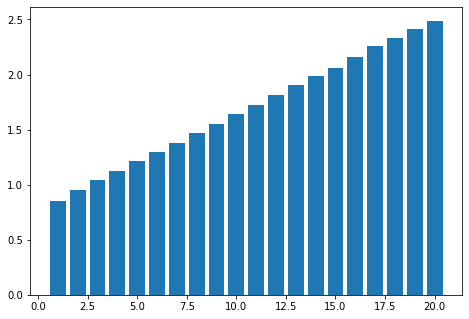

In [ ]:
history=model.fit(train_data,train_label,
          batch_size = batch_size,
          epochs = epochs,
          verbose=1,
          validation_data=(test_data,test_label),
          callbacks=[timecallback()])   #指定验证集

####模型函数

In [ ]:
def mlp(interpolation,opt,epoch):
  dl = DataLoader(interpolation)
  train_data,train_label,test_data,test_label=dl.get_data()
  model = Sequential()
  model.add(Dense(512,activation='relu',input_shape=(400,)))
  model.add(Dropout(0.2))
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(num_classes,activation='softmax'))
  # model.summary()
  model.compile(loss='categorical_crossentropy',  #损失函数，多分类交叉熵
              optimizer=opt,  #优化器
              metrics=['accuracy'])
  history=model.fit(train_data,train_label,
          batch_size = batch_size,
          epochs = epoch,
          verbose=1,
          validation_data=(test_data,test_label))
  val_acc = history.history['val_accuracy']
  return val_acc

In [ ]:
mlp(cv2.INTER_AREA,tf.keras.optimizers.SGD(lr=0.1),20)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
9/9 [==============================] - 1s 32ms/step - loss: 2.7128 - accuracy: 0.1632 - val_loss: 2.0948 - val_accuracy: 0.5556
Epoch 2/20
9/9 [==============================] - 0s 12ms/step - loss: 2.0044 - accuracy: 0.4757 - val_loss: 1.3184 - val_accuracy: 0.7986
Epoch 3/20
9/9 [==============================] - 0s 10ms/step - loss: 1.3124 - accuracy: 0.7014 - val_loss: 1.0427 - val_accuracy: 0.7778
Epoch 4/20
9/9 [==============================] - 0s 10ms/step - loss: 0.8901 - accuracy: 0.8125 - val_loss: 0.6795 - val_accuracy: 0.8681
Epoch 5/20
9/9 [==============================] - 0s 10ms/step - loss: 0.6226 - accuracy: 0.8611 - val_loss: 0.5350 - val_accuracy: 0.8819
Epoch 6/20
9/9 [==============================] - 0s 11ms/step - loss: 0.4054 - accuracy: 0.9375 - val_loss: 0.3989 - val_accuracy: 0.9097
Epoch 7/20
9/9 [==============================] - 0s 10ms/step - loss: 0.3108 - accuracy: 0.9583 - val_loss: 0.4144 - val_accuracy: 0.8750
Epoch 8/20
9/9 [===========

[0.5555555820465088,
 0.7986111044883728,
 0.7777777910232544,
 0.8680555820465088,
 0.8819444179534912,
 0.9097222089767456,
 0.875,
 0.8888888955116272,
 0.9166666865348816,
 0.9097222089767456,
 0.9236111044883728,
 0.9444444179534912,
 0.9236111044883728,
 0.9305555820465088,
 0.9513888955116272,
 0.9375,
 0.9444444179534912,
 0.9583333134651184,
 0.9513888955116272,
 0.9513888955116272]

####【mlp】比较不同的学习率，带来的不同影响

==================0.01==================
Epoch 1/20
9/9 [==============================] - 0s 22ms/step - loss: 2.9578 - accuracy: 0.0799 - val_loss: 2.8217 - val_accuracy: 0.1667
Epoch 2/20
9/9 [==============================] - 0s 7ms/step - loss: 2.8163 - accuracy: 0.1354 - val_loss: 2.7086 - val_accuracy: 0.2014
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 2.7116 - accuracy: 0.1493 - val_loss: 2.6042 - val_accuracy: 0.3056
Epoch 4/20
9/9 [==============================] - 0s 6ms/step - loss: 2.6039 - accuracy: 0.2500 - val_loss: 2.5072 - val_accuracy: 0.3681
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 2.5330 - accuracy: 0.3090 - val_loss: 2.4101 - val_accuracy: 0.4444
Epoch 6/20
9/9 [==============================] - 0s 7ms/step - loss: 2.4043 - accuracy: 0.3507 - val_loss: 2.3180 - val_accuracy: 0.5069
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 2.3070 - accuracy: 0.3750 - val_loss: 2.2196 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
9/9 [==============================] - 0s 21ms/step - loss: 2.8519 - accuracy: 0.1215 - val_loss: 2.4607 - val_accuracy: 0.3194
Epoch 2/20
9/9 [==============================] - 0s 7ms/step - loss: 2.3413 - accuracy: 0.3264 - val_loss: 1.9836 - val_accuracy: 0.6111
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 1.9576 - accuracy: 0.5312 - val_loss: 1.5525 - val_accuracy: 0.7569
Epoch 4/20
9/9 [==============================] - 0s 7ms/step - loss: 1.4917 - accuracy: 0.6701 - val_loss: 1.2093 - val_accuracy: 0.8264
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 1.2420 - accuracy: 0.7674 - val_loss: 1.0326 - val_accuracy: 0.7917
Epoch 6/20
9/9 [==============================] - 0s 7ms/step - loss: 0.9851 - accuracy: 0.8160 - val_loss: 0.8115 - val_accuracy: 0.8472
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 0.8127 - accuracy: 0.8611 - val_loss: 0.6534 - val_accuracy: 0.9028
Epoch 8/20
9/9 [=================

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
9/9 [==============================] - 1s 22ms/step - loss: 2.7848 - accuracy: 0.1285 - val_loss: 2.1489 - val_accuracy: 0.5694
Epoch 2/20
9/9 [==============================] - 0s 6ms/step - loss: 1.9897 - accuracy: 0.5069 - val_loss: 1.4219 - val_accuracy: 0.7153
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 1.3290 - accuracy: 0.6944 - val_loss: 0.9603 - val_accuracy: 0.7778
Epoch 4/20
9/9 [==============================] - 0s 7ms/step - loss: 0.8683 - accuracy: 0.8090 - val_loss: 0.5853 - val_accuracy: 0.8889
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 0.6261 - accuracy: 0.8611 - val_loss: 0.4789 - val_accuracy: 0.9167
Epoch 6/20
9/9 [==============================] - 0s 8ms/step - loss: 0.4681 - accuracy: 0.8958 - val_loss: 0.4207 - val_accuracy: 0.9097
Epoch 7/20
9/9 [==============================] - 0s 7ms/step - loss: 0.2984 - accuracy: 0.9549 - val_loss: 0.3367 - val_accuracy: 0.9444
Epoch 8/20
9/9 [=================

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
9/9 [==============================] - 0s 21ms/step - loss: 2.7250 - accuracy: 0.1597 - val_loss: 2.2256 - val_accuracy: 0.3125
Epoch 2/20
9/9 [==============================] - 0s 7ms/step - loss: 1.7919 - accuracy: 0.4965 - val_loss: 1.2749 - val_accuracy: 0.6458
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 1.2174 - accuracy: 0.7083 - val_loss: 0.6552 - val_accuracy: 0.8264
Epoch 4/20
9/9 [==============================] - 0s 7ms/step - loss: 0.5417 - accuracy: 0.8819 - val_loss: 0.6410 - val_accuracy: 0.8125
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 0.3858 - accuracy: 0.9097 - val_loss: 0.6871 - val_accuracy: 0.8125
Epoch 6/20
9/9 [==============================] - 0s 7ms/step - loss: 0.3863 - accuracy: 0.9306 - val_loss: 0.2803 - val_accuracy: 0.9375
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 0.1210 - accuracy: 0.9826 - val_loss: 0.2404 - val_accuracy: 0.9236
Epoch 8/20
9/9 [=================

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
9/9 [==============================] - 0s 21ms/step - loss: 4.0941 - accuracy: 0.0625 - val_loss: 2.7011 - val_accuracy: 0.1042
Epoch 2/20
9/9 [==============================] - 0s 6ms/step - loss: 2.6434 - accuracy: 0.2083 - val_loss: 3.0059 - val_accuracy: 0.1667
Epoch 3/20
9/9 [==============================] - 0s 6ms/step - loss: 2.5279 - accuracy: 0.2951 - val_loss: 2.1208 - val_accuracy: 0.3194
Epoch 4/20
9/9 [==============================] - 0s 6ms/step - loss: 2.1003 - accuracy: 0.4097 - val_loss: 1.3800 - val_accuracy: 0.5486
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 1.9183 - accuracy: 0.4549 - val_loss: 2.8956 - val_accuracy: 0.3056
Epoch 6/20
9/9 [==============================] - 0s 7ms/step - loss: 2.2106 - accuracy: 0.4201 - val_loss: 1.0798 - val_accuracy: 0.7569
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 0.9504 - accuracy: 0.7257 - val_loss: 0.6612 - val_accuracy: 0.8472
Epoch 8/20
9/9 [=================

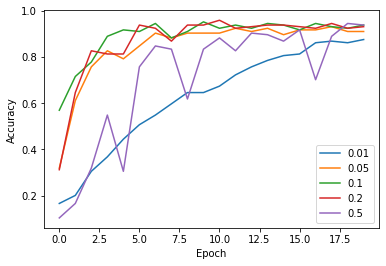

In [ ]:
epoch=20
lrs=[0.01,0.05,0.1,0.2,0.5]
lables=["0.01","0.05","0.1","0.2","0.5"]
for i in range(len(lables)):
  print("=================="+lables[i]+"==================")
  val_acc=mlp(cv2.INTER_AREA,tf.keras.optimizers.SGD(lr=lrs[i]),epoch)
  plt.plot(np.arange(0, epoch),val_acc, label=lables[i])
plt.xlabel("Epoch")#横坐标名字
plt.ylabel("Accuracy")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

####【mlp】比较不同的优化器，带来的不同影响

==================SGD==================
Epoch 1/20
9/9 [==============================] - 0s 22ms/step - loss: 3.0810 - accuracy: 0.0694 - val_loss: 2.8463 - val_accuracy: 0.1042
Epoch 2/20
9/9 [==============================] - 0s 6ms/step - loss: 2.8297 - accuracy: 0.1354 - val_loss: 2.7145 - val_accuracy: 0.1250
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 2.7150 - accuracy: 0.1944 - val_loss: 2.6020 - val_accuracy: 0.2639
Epoch 4/20
9/9 [==============================] - 0s 7ms/step - loss: 2.6105 - accuracy: 0.1944 - val_loss: 2.4991 - val_accuracy: 0.3681
Epoch 5/20
9/9 [==============================] - 0s 7ms/step - loss: 2.5717 - accuracy: 0.2604 - val_loss: 2.3968 - val_accuracy: 0.4236
Epoch 6/20
9/9 [==============================] - 0s 6ms/step - loss: 2.4051 - accuracy: 0.3333 - val_loss: 2.2976 - val_accuracy: 0.5069
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 2.3209 - accuracy: 0.3889 - val_loss: 2.1984 - val_accuracy: 

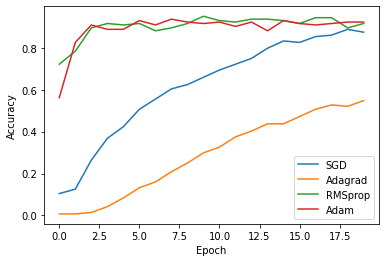

In [ ]:
epoch=20
opts=[tf.keras.optimizers.SGD(),tf.keras.optimizers.Adagrad(),tf.keras.optimizers.RMSprop(),tf.keras.optimizers.Adam()]
lables=["SGD","Adagrad","RMSprop","Adam"]
for i in range(len(lables)):
  print("=================="+lables[i]+"==================")
  val_acc=mlp(cv2.INTER_AREA,opts[i],epoch)
  plt.plot(np.arange(0, epoch),val_acc, label=lables[i])
plt.xlabel("Epoch")#横坐标名字
plt.ylabel("Accuracy")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

####【mlp】对于不同的resize算法，带来的不同影响

==================NEAREST==================
Epoch 1/20
9/9 [==============================] - 1s 32ms/step - loss: 2.9037 - accuracy: 0.1285 - val_loss: 2.5310 - val_accuracy: 0.3611
Epoch 2/20
9/9 [==============================] - 0s 11ms/step - loss: 2.3272 - accuracy: 0.3403 - val_loss: 1.9708 - val_accuracy: 0.6458
Epoch 3/20
9/9 [==============================] - 0s 12ms/step - loss: 1.7274 - accuracy: 0.5486 - val_loss: 1.5242 - val_accuracy: 0.6667
Epoch 4/20
9/9 [==============================] - 0s 11ms/step - loss: 1.1676 - accuracy: 0.7569 - val_loss: 1.1936 - val_accuracy: 0.7083
Epoch 5/20
9/9 [==============================] - 0s 11ms/step - loss: 0.7983 - accuracy: 0.8090 - val_loss: 0.9886 - val_accuracy: 0.7639
Epoch 6/20
9/9 [==============================] - 0s 11ms/step - loss: 0.6114 - accuracy: 0.8750 - val_loss: 0.8477 - val_accuracy: 0.7847
Epoch 7/20
9/9 [==============================] - 0s 11ms/step - loss: 0.4707 - accuracy: 0.8924 - val_loss: 0.7883 - val_

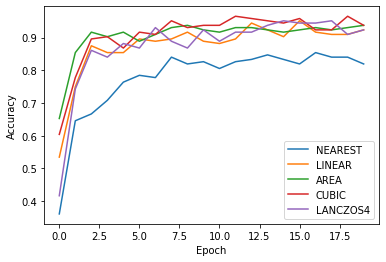

In [ ]:
epoch=20
interpolations=[cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
lables=["NEAREST","LINEAR","AREA","CUBIC","LANCZOS4"]
for i in range(5):
  print("=================="+lables[i]+"==================")
  val_acc=mlp(interpolations[i],"Adam",epoch)
  plt.plot(np.arange(0, epoch),val_acc, label=lables[i])
plt.xlabel("Epoch")#横坐标名字
plt.ylabel("Accuracy")#纵坐标名字
plt.legend(loc = "best")#图例
plt.show()

## 【CNN】CNN

In [ ]:
train_set=[]
train_labels=[]
test_set=[]
test_labels=[]
train_set,train_labels,test_set,test_labels = getdataset(cv2.INTER_AREA)
train_set = tf.reshape(train_set, [288, 20, 20])
test_set = tf.reshape(test_set, [144, 20, 20])
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=19)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=19)
print(train_labels.shape)

(288, 19)


In [ ]:
def cnn(interpolation,epoch,lr,bs):
  train_set=[]
  train_labels=[]
  test_set=[]
  test_labels=[]
  train_set,train_labels,test_set,test_labels = getdataset(interpolation)

  # pca = PCA(n_components = k)
  # pca.fit(train_set)
  # train_pca_set=np.real(pca.transform(train_set))
  # test_pca_set=np.real(pca.transform(test_set))

  train_set = tf.reshape(train_set, [288, 20, 20])
  test_set = tf.reshape(test_set, [144, 20, 20])
  train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=19)
  test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=19)


  # 搭建CNN
  model = Sequential()
  model.add(Convolution2D(
                input_shape=(20, 20, 1),
                filters=32,
                kernel_size=5,
                strides=1,
                padding='same',
                activation='relu'
              ))
  model.add(MaxPooling2D(
                pool_size=2,
                strides=2,
                padding='same',
              ))

  model.add(Convolution2D(64, 5, strides=1, padding='same', activation='relu'))
  model.add(MaxPooling2D(2, 2, 'same'))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(19, activation='softmax'))
  adam = Adam(learning_rate=lr)
  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

  history=model.fit(train_set, train_labels, batch_size=bs, epochs=epoch, validation_data=(test_set, test_labels))
  val_acc = history.history['val_accuracy']
  print("在resize方法为: {}, 学习率为: {}, bs为: {}时， 准确率为 {}".format(interpolation,lr,bs,val_acc))
  return val_acc

In [ ]:
cnn(cv2.INTER_AREA,20,0.001,32)

Epoch 1/20
9/9 [==============================] - 2s 106ms/step - loss: 2.8980 - accuracy: 0.0903 - val_loss: 2.7100 - val_accuracy: 0.4792
Epoch 2/20
9/9 [==============================] - 1s 79ms/step - loss: 2.4965 - accuracy: 0.3750 - val_loss: 2.0008 - val_accuracy: 0.6528
Epoch 3/20
9/9 [==============================] - 1s 78ms/step - loss: 1.7202 - accuracy: 0.5417 - val_loss: 1.1519 - val_accuracy: 0.7986
Epoch 4/20
9/9 [==============================] - 1s 80ms/step - loss: 1.0304 - accuracy: 0.7708 - val_loss: 0.6136 - val_accuracy: 0.8681
Epoch 5/20
9/9 [==============================] - 1s 79ms/step - loss: 0.6205 - accuracy: 0.8229 - val_loss: 0.4379 - val_accuracy: 0.8819
Epoch 6/20
9/9 [==============================] - 1s 78ms/step - loss: 0.3525 - accuracy: 0.9201 - val_loss: 0.3439 - val_accuracy: 0.9028
Epoch 7/20
9/9 [==============================] - 1s 80ms/step - loss: 0.1802 - accuracy: 0.9618 - val_loss: 0.3063 - val_accuracy: 0.9097
Epoch 8/20
9/9 [==========

[0.4791666567325592,
 0.6527777910232544,
 0.7986111044883728,
 0.8680555820465088,
 0.8819444179534912,
 0.9027777910232544,
 0.9097222089767456,
 0.9305555820465088,
 0.9027777910232544,
 0.9027777910232544,
 0.9305555820465088,
 0.9097222089767456,
 0.8958333134651184,
 0.8958333134651184,
 0.9027777910232544,
 0.9166666865348816,
 0.9166666865348816,
 0.8888888955116272,
 0.9236111044883728,
 0.9236111044883728]

####【CNN】对于不同的resize算法、学习率和BS，带来的不同影响

Epoch 1/20
18/18 [==============================] - 2s 58ms/step - loss: 4.1667 - accuracy: 0.0486 - val_loss: 2.8978 - val_accuracy: 0.0556
Epoch 2/20
18/18 [==============================] - 1s 46ms/step - loss: 2.9171 - accuracy: 0.0382 - val_loss: 2.9025 - val_accuracy: 0.0556
Epoch 3/20
18/18 [==============================] - 2s 101ms/step - loss: 2.9192 - accuracy: 0.0382 - val_loss: 2.8975 - val_accuracy: 0.0556
Epoch 4/20
18/18 [==============================] - 2s 115ms/step - loss: 2.9209 - accuracy: 0.0486 - val_loss: 2.8964 - val_accuracy: 0.0556
Epoch 5/20
18/18 [==============================] - 2s 96ms/step - loss: 2.9097 - accuracy: 0.0451 - val_loss: 2.8939 - val_accuracy: 0.0556
Epoch 6/20
18/18 [==============================] - 1s 53ms/step - loss: 2.9062 - accuracy: 0.0660 - val_loss: 2.8933 - val_accuracy: 0.0556
Epoch 7/20
18/18 [==============================] - 1s 46ms/step - loss: 2.9183 - accuracy: 0.0590 - val_loss: 2.8932 - val_accuracy: 0.0556
Epoch 8/20


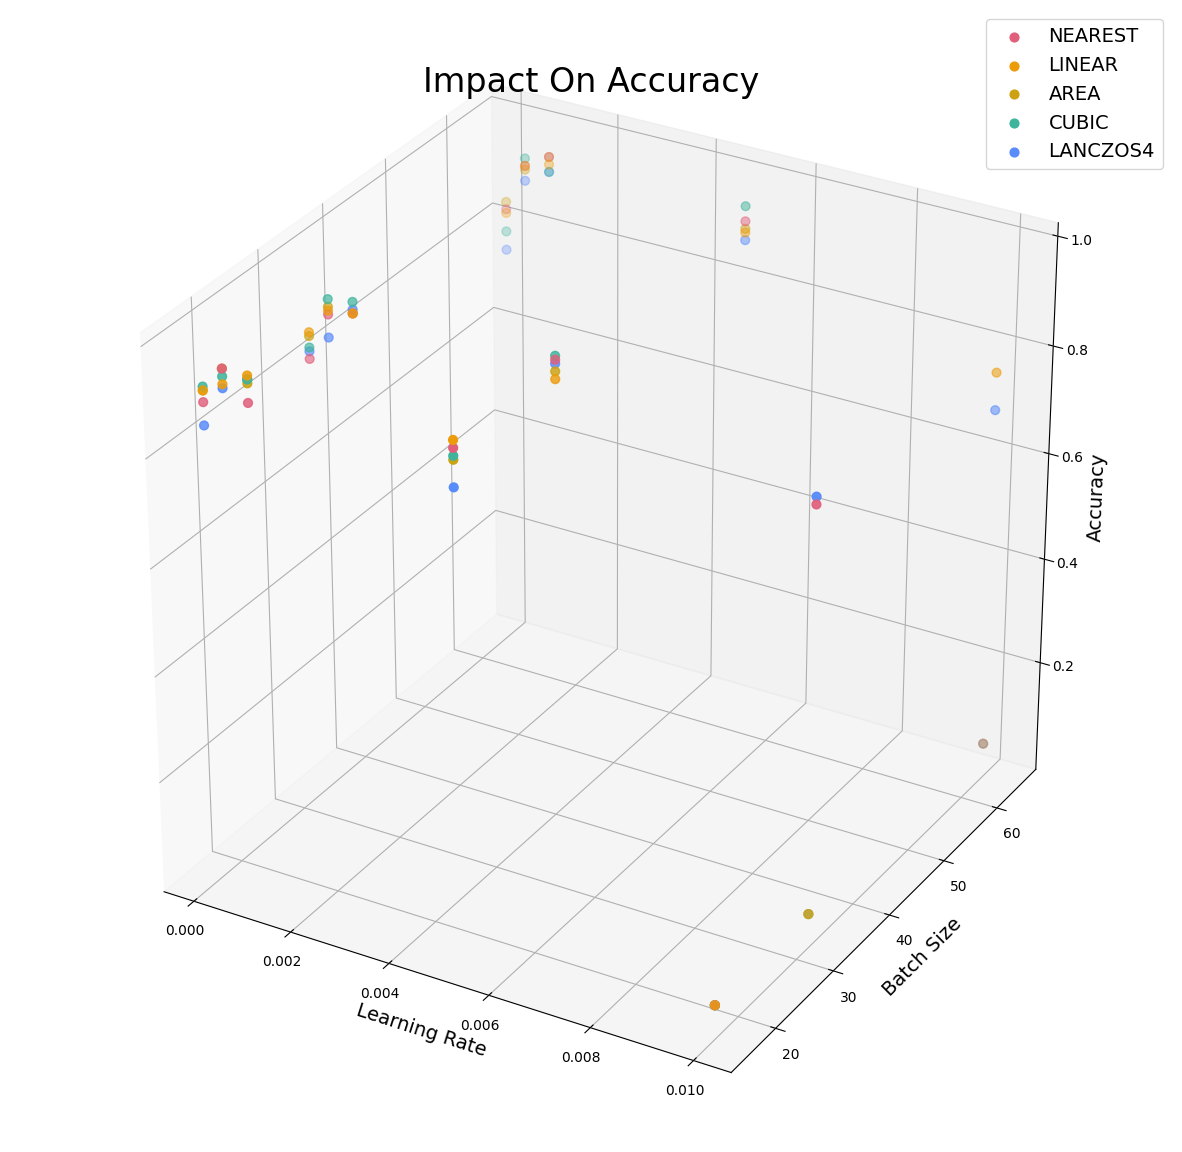

In [ ]:
figure = plt.figure(figsize=(15, 15), dpi=100)
ax = figure.add_subplot(projection='3d')

interpolations=[cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
colors = ['#E0607C', '#EC9C0A', '#CCA212', '#3EB49C', '#598BFA']
labels = ['NEAREST', 'LINEAR', 'AREA', "CUBIC", "LANCZOS4"]
learning_rate = [0.01, 0.005, 0.001, 0.0005, 0.0001]
batch_size = [16, 32, 64]
lables=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
for i in range(len(interpolations)):
  x=[]
  y=[]
  z=[]
  for j in range(len(learning_rate)):
    for k in range(len(batch_size)):
      val_acc=cnn(interpolations[i],20,learning_rate[j],batch_size[k])
      x.append(learning_rate[j])
      y.append(batch_size[k])
      z.append(max(val_acc))
  ax.scatter(xs=x, ys=y, zs=z, color=colors[i], label=labels[i],s=40)

ax.set_title("Impact On Accuracy", fontsize=24)
ax.set_xlabel('Learning Rate', fontsize=14)
ax.set_ylabel('Batch Size', fontsize=14)
ax.set_zlabel('Accuracy', fontsize=14)
ax.legend(loc="best", fontsize=14)

plt.show()